In [1]:
#Dependencies for installing when running on Google Collab; Use if necessary.


#pip install dython 
#!pip install numpy
#pip install pandas
#!pip install seaborn
#!pip install scipy
#pip install -U matplotlib
#!pip install sklearn
#!pip install scikit-plot
#!pip install plotly

<div style="align-items: center;">
<h1 style="float: left; text-align: center; vertical-align: center;"> Analysis of factors affecting Cardiovascular disease </h1>
<img src="heartdisease.png" style="height: 10vw; width: auto; display: inline-block;">
</div>




<h2> Table of Contents </h2>
<a id='0'></a>

# 1 <a href='#1'>Introduction</a>

- 1.1 <a href='#1.1'>Libraries</a>
- 1.2 <a href='#1.2'>Data Preprocessing</a>

# 2 <a href='#2'>Exploratory Data Analysis</a>

- 2.1 <a href='#2.1'>Uni-Variate Data Analysis </a>
- 2.2 <a href='#2.2'>Multi-Variate Data Analysis </a>
- 2.3 <a href='#2.3'>Correlation</a>

# 3 <a href='#3'>Modelling</a>
- 3.1 <a href='#3.1'>Logistic Regression</a>
- 3.2 <a href='#3.2'>Decision Tree</a>
- 3.3 <a href='#3.3'>Random Forest</a>
- 3.4 <a href='#3.4'>XGBoost</a>
- 3.5 <a href='#3.5'>Naive Bayes</a>
- 3.6 <a href='#3.6'>KNN</a>

# 5. <a href='#4'>Conclusion</a>

<a id='1'></a>
<h2> 1. Introduction </h2>

<font color=#591226><font size = "7"> Cardiovascular disease (CVD) is the number one cause of death globally.




The number of deaths from CVD increased by 42.4% from 1990 to 2015. On the other hand, CVD led to over 17 million deaths, 330 million years of life lost and 35.6 million years lived with disability in 2017 worldwide. Meanwhile, it was projected that CVD would be the cause of more than 23 million deaths in 2030 around the world (Maedeh, Farid and Masoud, 2021)
<br><br>
Source: https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-021-10429-0
<br><br>
Hence, our group decided to choose the dataset on cardiovascular disease, and use machine learning models to find out whether there are any factors that strongly affect the presence of cardiovascular disease, and henceforth use these machine learning models to identify people with early risks of cardiovascular disease so that they can seek treatment early.


The dataset we obtained is the __Cardiovascular Disease Dataset__ obtained from Kaggle

Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=voteCount

We came up with 2 questions to answer in our project, namely:

1. How do each of the variables (risk factors) affect having CVD?

2. Based on a person’s health profile, can we predict if a person is likely to have CVD?

In doing so, we also observe relationships between certain individual variables in the midst of our analysis.

<a id='1.1'></a>
<h3> 1.1 Libraries 

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from dython.nominal import associations
from pylab import rcParams
import warnings
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve,plot_precision_recall_curve
%matplotlib inline
import plotly.express as ex
import plotly.figure_factory as ff

<a id='1.2'></a>
<h3> 1.2 Data Preprocessing</h3>

In [3]:
df = pd.read_csv('cardio_train.csv', delimiter=';')
print(f"The shape of the dataset is: {df.shape}")

The shape of the dataset is: (70000, 13)


We have 70000 entries in our dataset.

In [4]:
df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Making a quick observation at our data, we have a total of 13 columns

In [5]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We have a total of 13 columns, which includes 12 features.

We can omit id as a feature, since it is simply being used to label the individual data points.

Referencing the data description from <a href='https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download'> Kaggle </a>

It is mentioned that there are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.


And this is how the features are categorized:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [6]:
 #check if dataset has duplicated entries
df.duplicated().any() 


False

In [7]:
#check for unique types of data
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

As observed, the data is split into 2 types, namely:

Numerical:
- id
- age
- height
- weight
- ap_hi 
- ap_lo

Categorical:
- gender
- cholesterol
- gluc
- smoke
- alco
- active
- cardio

<a id='1.3'></a>
<h4>1.3 Data Cleaning</h4>

<h4>Numerical</h4>

<h5>ID</h5>

In [8]:
# dropping id
df = df.drop(['id'], axis = 'columns')

As mentioned, ID is irrelevant as a feature because it is simply being used to label the individual data points.

<h5> Age </h5>

In [9]:
# changing the age column into year
df['age'] = (df['age']/365).round(0).astype('float')

Here, we convert age from days to years, because age is normally measured in years, i.e. if someone asks you how old you are, would you tell them in days or years?

In [10]:
df['age'].describe()    #describe age

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

Interestingly, the minimum age of this dataset is 30, maximum is 65, and 68% of the dataset falls between 47 to 60 years in the data set, meaning this dataset leans towards the older side.

<h5>Height and Weight</h5>

Height and weight are both measurement values, obtained by examination of patients, and purely numerical.

In [11]:
df[['height','weight']].describe()

height        weight
count  70000.000000  70000.000000
mean     164.359229     74.205690
std        8.210126     14.395757
min       55.000000     10.000000
25%      159.000000     65.000000
50%      165.000000     72.000000
75%      170.000000     82.000000
max      250.000000    200.000000

The dataset here is odd, since there exists a minimum of 55cm in height and 10kg in weight, which verifiably should not exist in real life. Adding these data points also devalues the question as to whether we can reliably answer whether certain factors contribute to presence of cardiovascular disease, since such people with extreme heights and weights are extreme outliers by nature 

In [12]:
#Using IQR rule to remove height outliers
height_IQR = df['height'].quantile(0.75)-df['height'].quantile(0.25)
height_upper = df['height'].quantile(0.75)+1.5*height_IQR
height_lower = df['height'].quantile(0.25)-1.5*height_IQR
height_out = df[(df['height']>height_upper)|(df['height']<height_lower)].index
df.drop(height_out, inplace=True)

In [13]:
weight_IQR = df["weight"].quantile(0.75)-df["weight"].quantile(0.25)
weight_upper = df["weight"].quantile(0.75)+1.5*weight_IQR
weight_lower = df["weight"].quantile(0.25)-1.5*weight_IQR
weight_out = df[(df["weight"]>weight_upper)|(df["weight"]<weight_lower)].index
df.drop(weight_out, inplace=True)

In [14]:
df[['height','weight']].describe()

height        weight
count  67723.000000  67723.000000
mean     164.310013     73.059601
std        7.565537     12.407575
min      143.000000     40.000000
25%      159.000000     65.000000
50%      165.000000     72.000000
75%      170.000000     81.000000
max      186.000000    107.000000

The minimums and maximums for height and weight are now much more acceptable.

<h5>BMI</h5>

For more clarity in factors, we look at BMI to identify if height and weight combined would be a more telling factor of presence of cardiovascular disease, or whether height and weight in isolation are a better factor to be used.

In [15]:
#defining bmi
def BMI(df):
    return df['weight'] / (df['height']/100)**2
 
df['bmi'] = df.apply(BMI, axis=1)

In [16]:
df['bmi'].describe()

count    67723.000000
mean        27.104394
std          4.608238
min         13.520822
25%         23.833005
50%         26.222685
75%         29.760838
max         50.891795
Name: bmi, dtype: float64

To potentially improve the performance of our machine learning models, I decided to bin the BMI levels and categorize them based on existing domain knowledge, namely existing parameters set by Singapore's heart foundation. 
<img src="bmi.png">

In [17]:
#adding bmi into dataframe
df['bmi_category'] = df['bmi'].apply(lambda x :'Underweight' if x <= 18.5 else ('Normal' if (x > 18.5 and x <= 22.9) else ( 'Overweight' if (x > 23 and x <= 29.9) else 'Obese')) )

In [18]:
df['bmi_category'].value_counts()

Overweight     39926
Obese          17123
Normal         10088
Underweight      586
Name: bmi_category, dtype: int64

Interestingly, according to existing BMI paremeters, a large portion of individuals in this dataset fall under the overweight and obese categories rather than normal and underweight.

<h5>Systolic Blood Pressure and Diastolic Blood Pressure (ap_hi and ap_lo)<h5>

In [19]:
df[['ap_hi','ap_lo']].describe()

ap_hi         ap_lo
count  67723.000000  67723.000000
mean     128.585001     95.993030
std      156.523767    189.111316
min     -150.000000    -70.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max    16020.000000  11000.000000

Systolic blood pressure (ap_hi) is defined as pressure on blood vessels when your heart pumps blood and contracts/beats.

Diastolic blood pressure (ap_lo) is defined as the pressure when your heart relaxes between beats.

Systolic blood pressure will always be > than diastolic blood pressure, and also cannot be negative. It also cannot be a value of 16020 or 11000. We attribute the existence of these outliers due to data entry errors.

In [20]:
#removing datapoints where systolic blood pressure < diatolic blood pressure
df = df[df['ap_hi'] > df['ap_lo']].reset_index(drop=True)

In [21]:
#again, using IQR rule to remove outliers for ap_hi and ap_lo
ap_hi_IQR = df['ap_hi'].quantile(0.75)-df['ap_hi'].quantile(0.25)
ap_hi_upper = df['ap_hi'].quantile(0.75)+1.5*ap_hi_IQR
ap_hi_lower = df['ap_hi'].quantile(0.25)-1.5*ap_hi_IQR
ap_hi_out = df[(df['ap_hi']>ap_hi_upper)|(df['ap_hi']<ap_hi_lower)].index
df.drop(ap_hi_out, inplace=True)

In [22]:
ap_lo_IQR = df['ap_lo'].quantile(0.75)-df['ap_lo'].quantile(0.25)
ap_lo_upper = df['ap_lo'].quantile(0.75)+1.5*ap_lo_IQR
ap_lo_lower = df['ap_lo'].quantile(0.25)-1.5*ap_lo_IQR
ap_lo_out = df[(df['ap_lo']>ap_hi_upper)|(df['ap_lo']<ap_lo_lower)].index
df.drop(ap_lo_out, inplace=True)

In [23]:
df[['ap_hi','ap_lo']].describe()

ap_hi         ap_lo
count  62836.000000  62836.000000
mean     126.590123     81.862722
std       14.457519      7.986812
min       90.000000     65.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max      170.000000    150.000000

To potentially improve the performance of our machine learning models, similarly, I decided to bin the blood pressure levels and categorize them based on existing domain knowledge, namely existing parameters set by Singapore's heart foundation. 
<img src="blood_pressure_level.png">

In [24]:
def blood_pressure_level(data):
    if (data['ap_hi'] < 129) and (data['ap_lo'] <= 80):
        return 'Normal'
    if (data['ap_hi'] >= 130 and data['ap_hi'] <= 139) | (data['ap_lo'] > 80 and data['ap_lo'] <= 89) :
        return 'High_Normal'
    if (data['ap_hi'] >= 140 and data['ap_hi'] <= 159) | (data['ap_lo'] >= 90 and data['ap_lo'] <= 99):
        return 'Stage_1_Hypertension'
    if (data['ap_hi'] >= 160) | (data['ap_lo'] >= 100):
        return 'Stage_2_Hypertension'

df['blood_pressure_level'] = df.apply(blood_pressure_level, axis=1)
df['blood_pressure_level'].value_counts()

Normal                  35941
Stage_1_Hypertension    15683
High_Normal              9117
Stage_2_Hypertension     2092
Name: blood_pressure_level, dtype: int64

<h5>Pulse Pressure</h5>

Pulse Pressure, similar to BMI, is a feature that combines both Systolic BP and Diastolic BP into one feature, to find out if both factors play together to affect the presence of cardiovascular disease, or just individually.

In [25]:
def pulse_pressure(df):
    return df['ap_hi'] - (df['ap_lo'])
 
df['pulse_pressure'] = df.apply(pulse_pressure, axis=1)

In [26]:
df['pulse_pressure'].describe()

count    62836.000000
mean        44.727401
std         10.406769
min          5.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        103.000000
Name: pulse_pressure, dtype: float64

<h5>Categorical Values</h5>

Values are already encoded due to nature of dataset, but we can look at following to find out which feature is which.

In [27]:
# df['gender'].replace({1: 'female', 2: 'male'}, inplace = True)
# df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
# df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
# df['smoke'].replace({0: 'No', 1: 'Yes'}, inplace = True)
# df['alco'].replace({0: 'No', 1: 'Yes'}, inplace = True)
# df['active'].replace({0: 'No', 1: 'Yes'}, inplace = True)
# df['cardio'].replace({0: 'No', 1: 'Yes'}, inplace = True)


In [28]:
# df['gender'] = df['gender'].astype('category')
# df['cholesterol'] = df['cholesterol'].astype('category')
# df['gluc'] = df['gluc'].astype('category')
# df['smoke'] = df['smoke'].astype('category')
# df['alco'] = df['alco'].astype('category')
# df['active'] = df['active'].astype('category')
# df['cardio'] = df['cardio'].astype('category')
# df['blood_pressure_level'] = df['blood_pressure_level'].astype('category')
# df['bmi_category'] = df['bmi_category'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62836 entries, 0 to 66571
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   62836 non-null  float64
 1   gender                62836 non-null  int64  
 2   height                62836 non-null  int64  
 3   weight                62836 non-null  float64
 4   ap_hi                 62836 non-null  int64  
 5   ap_lo                 62836 non-null  int64  
 6   cholesterol           62836 non-null  int64  
 7   gluc                  62836 non-null  int64  
 8   smoke                 62836 non-null  int64  
 9   alco                  62836 non-null  int64  
 10  active                62836 non-null  int64  
 11  cardio                62836 non-null  int64  
 12  bmi                   62836 non-null  float64
 13  bmi_category          62836 non-null  object 
 14  blood_pressure_level  62833 non-null  object 
 15  pulse_pressure     

In [30]:
df.describe()

age        gender        height        weight         ap_hi  \
count  62836.000000  62836.000000  62836.000000  62836.000000  62836.000000   
mean      53.406232      1.349004    164.405946     73.216252    126.590123   
std        6.740247      0.476659      7.536196     12.282066     14.457519   
min       30.000000      1.000000    143.000000     40.000000     90.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       58.000000      2.000000    170.000000     81.000000    140.000000   
max       65.000000      2.000000    186.000000    107.000000    170.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  62836.000000  62836.000000  62836.000000  62836.000000  62836.000000   
mean      81.862722      1.359507      1.221243      0.086527      0.052327   
std        7.986812      0.676525      0.568171      0.281143      0.222687   
min       65.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      1.000000      1.000000      0.000000      0.000000   
max      150.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio           bmi  pulse_pressure  
count  62836.000000  62836.000000  62836.000000    62836.000000  
mean       0.804380      0.495862     27.133495       44.727401  
std        0.396681      0.499987      4.573113       10.406769  
min        0.000000      0.000000     13.520822        5.000000  
25%        1.000000      0.000000     23.875115       40.000000  
50%        1.000000      0.000000     26.259585       40.000000  
75%        1.000000      1.000000     29.760863       50.000000  
max        1.000000      1.000000     50.891795      103.000000

Check for null values

In [31]:
df.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
ap_hi                   0
ap_lo                   0
cholesterol             0
gluc                    0
smoke                   0
alco                    0
active                  0
cardio                  0
bmi                     0
bmi_category            0
blood_pressure_level    3
pulse_pressure          0
dtype: int64

In [32]:
df = df.dropna()

<a id='2'></a>
<h2> 2. Exploratory Analysis </h2>

<a id='2.1'></a>
<h3>2.1 Basic Uni-Variate Exploratory Analysis of Data</h3>



The most important part of looking at the dataset is finding out what we want to predict. In order to do this with the least bias in our models and ensure our models perform, we observe whether the predicted feature is balanced.

In [33]:
fig = ex.pie(df,names='cardio', title='Proportion Of Presence of Cardiovascular Disease in Sample')
fig.show()

Our predicted feature is very balanced, so there is not much to do about it.

<h4>Distribution plot of Numerical Values</h4>

<h5>Age</h5>

In [34]:
df['age'].describe()

count    62833.000000
mean        53.406474
std          6.740245
min         30.000000
25%         49.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

Here we find that age data is very high and leans towards the higher ends of age, as seen from how the mean is 53 with a std of 6.7, indicating that 66.7% of data lines inbetween 47 and 60.

<AxesSubplot:>

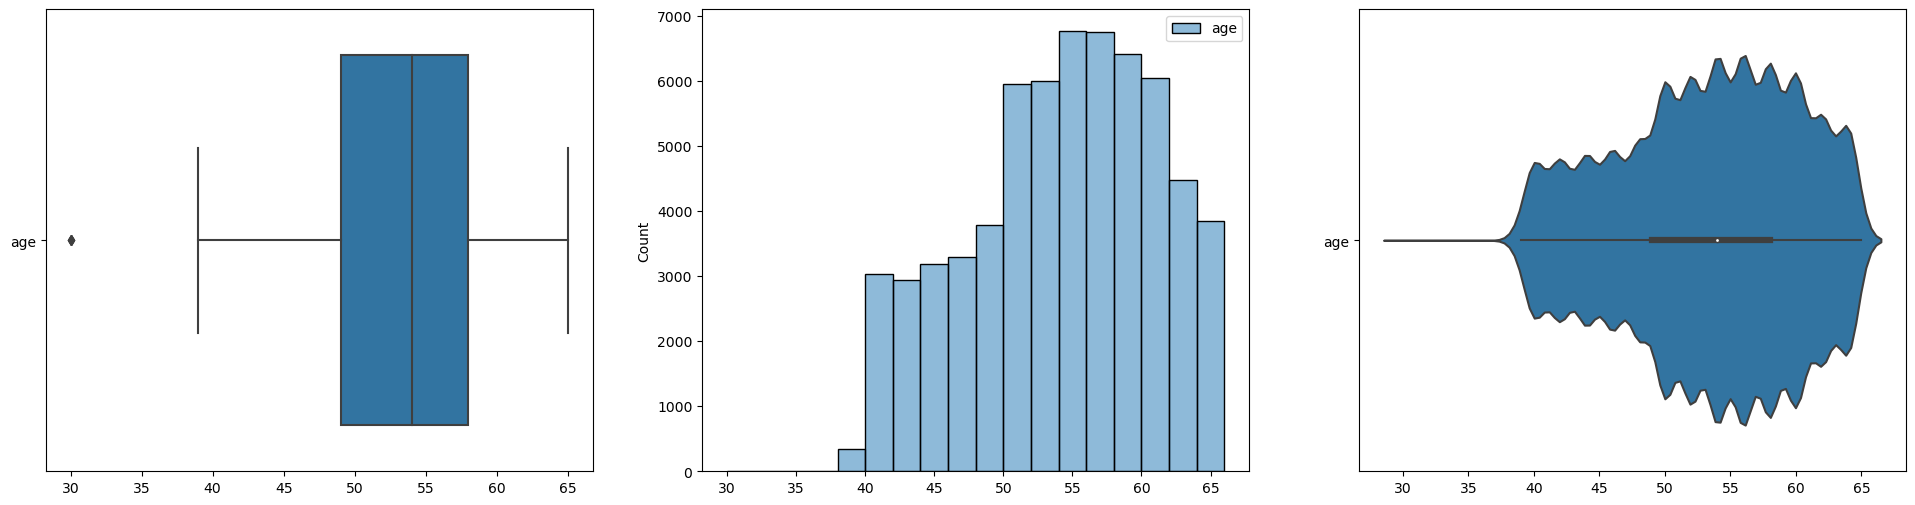

In [35]:
age = pd.DataFrame(df['age'])
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the basic uni-variate figures for HP
sns.boxplot(data = age, orient = "h", ax = axes[0])
sns.histplot(data = age, ax = axes[1], binwidth=2)
sns.violinplot(data = age, orient = "h", ax = axes[2])

Observing both histogram and box plots, we can see that the histogram appears to follow a normal-ish distribution as well, with the dataset leaning towards the upper ends of ages.

<h4>Height and Weight</h4>

In [36]:
df[['height','weight']].describe()

height        weight
count  62833.000000  62833.000000
mean     164.406076     73.216150
std        7.536263     12.282136
min      143.000000     40.000000
25%      159.000000     65.000000
50%      165.000000     72.000000
75%      170.000000     81.000000
max      186.000000    107.000000

Now that data has been cleaned, the minimum and maximum values for weight seems more realistic, and it shows since height of 2 standard deviations are more realistic in nature.

<AxesSubplot:>

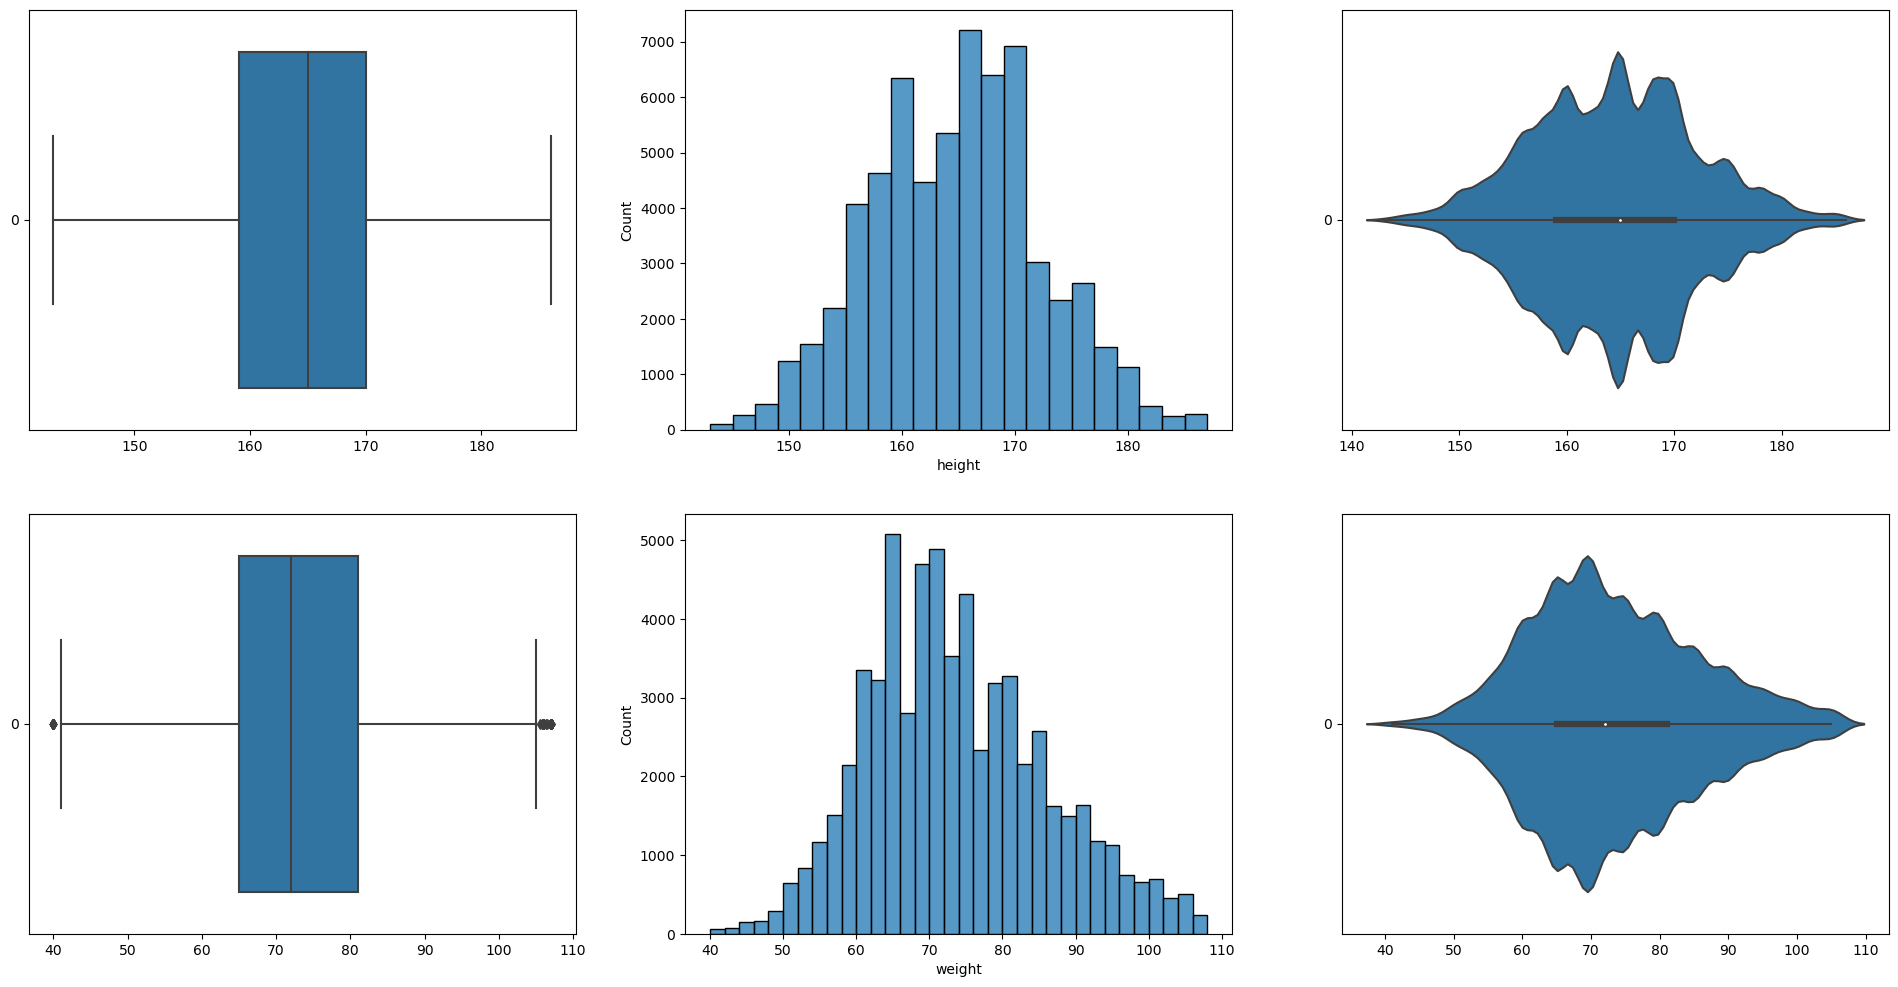

In [37]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sns.boxplot(data = df['height'], orient = "h", ax = axes[0,0])
sns.histplot(data = df['height'], ax = axes[0,1], binwidth=2)
sns.violinplot(data = df['height'], orient = "h", ax = axes[0,2])

sns.boxplot(data = df['weight'], orient = "h", ax = axes[1,0])
sns.histplot(data = df['weight'], ax = axes[1,1], binwidth=2)
sns.violinplot(data = df['weight'], orient = "h", ax = axes[1,2])

Datasets for height clearly display a similarly normal-ish dataset with certain peaks at certain heights, whether there is a difference between height of males or females can be seen later.

<h4>BMI</h4>

In [38]:
df[['bmi']].describe()

bmi
count  62833.000000
mean      27.133398
std        4.573012
min       13.520822
25%       23.875115
50%       26.259585
75%       29.760863
max       50.891795

Since the BMI is a derivation of height and weight, we expect the data to be realistic and not extreme, which is true. However, we do notice that the dataset itself has a higher leaning variation of BMI - since 1 std deviation from the mean is 23 to 31 BMI, which counts as overweight in the range of Singapore.

<AxesSubplot:>

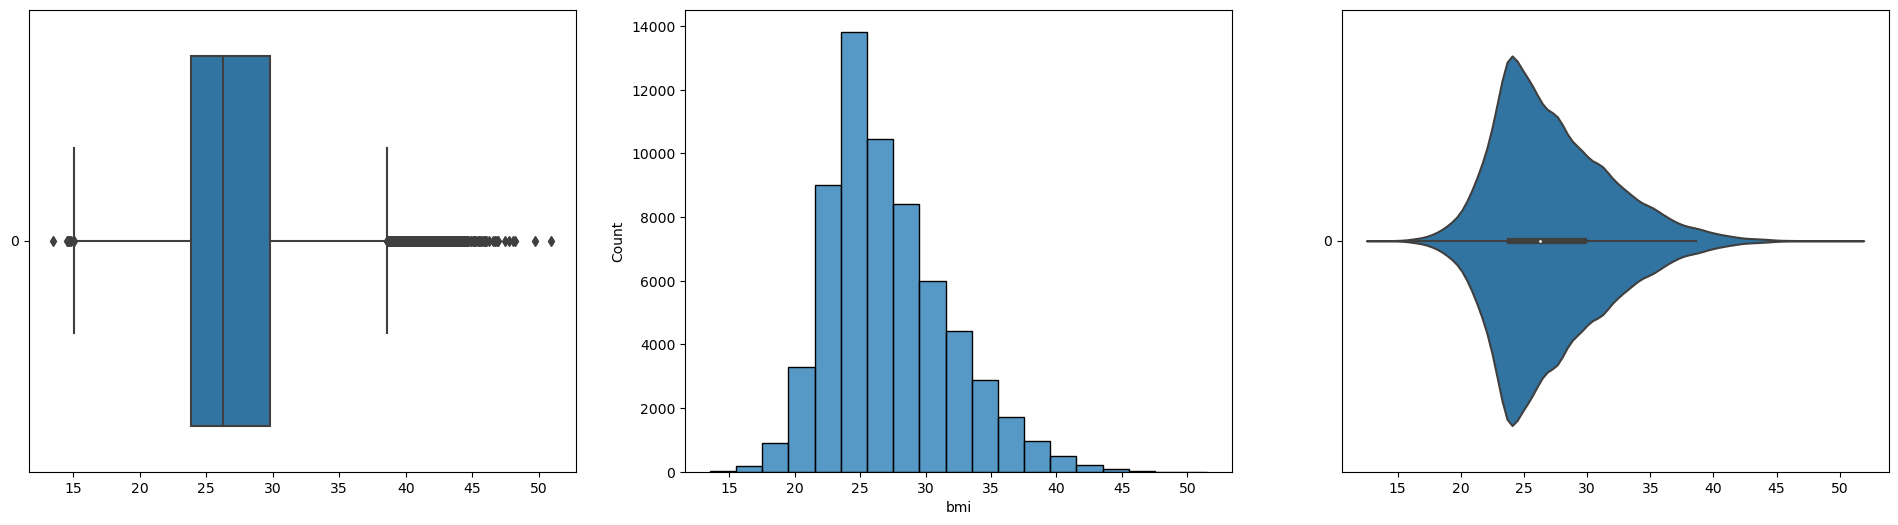

In [39]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.boxplot(data = df['bmi'], orient = "h", ax = axes[0])
sns.histplot(data = df['bmi'], ax = axes[1], binwidth=2)
sns.violinplot(data = df['bmi'], orient = "h", ax = axes[2])

Similarly, we see that the histogram plot follows a certain normal distribution while the box plots contain multiple points that lean towards the upper ends of BMI, which means that there are a lot of data points that are extremely high in BMI comparatively, which makes sense when you observe how the dataset is balanced in terms of people who have cardiovascular disease.

<h4>Blood Pressure</h4>

In [40]:
df[['ap_hi','ap_lo','pulse_pressure']].describe()

ap_hi         ap_lo  pulse_pressure
count  62833.000000  62833.000000    62833.000000
mean     126.590008     81.862875       44.727134
std       14.457855      7.986967       10.406942
min       90.000000     65.000000        5.000000
25%      120.000000     80.000000       40.000000
50%      120.000000     80.000000       40.000000
75%      140.000000     90.000000       50.000000
max      170.000000    150.000000      103.000000

<AxesSubplot:>

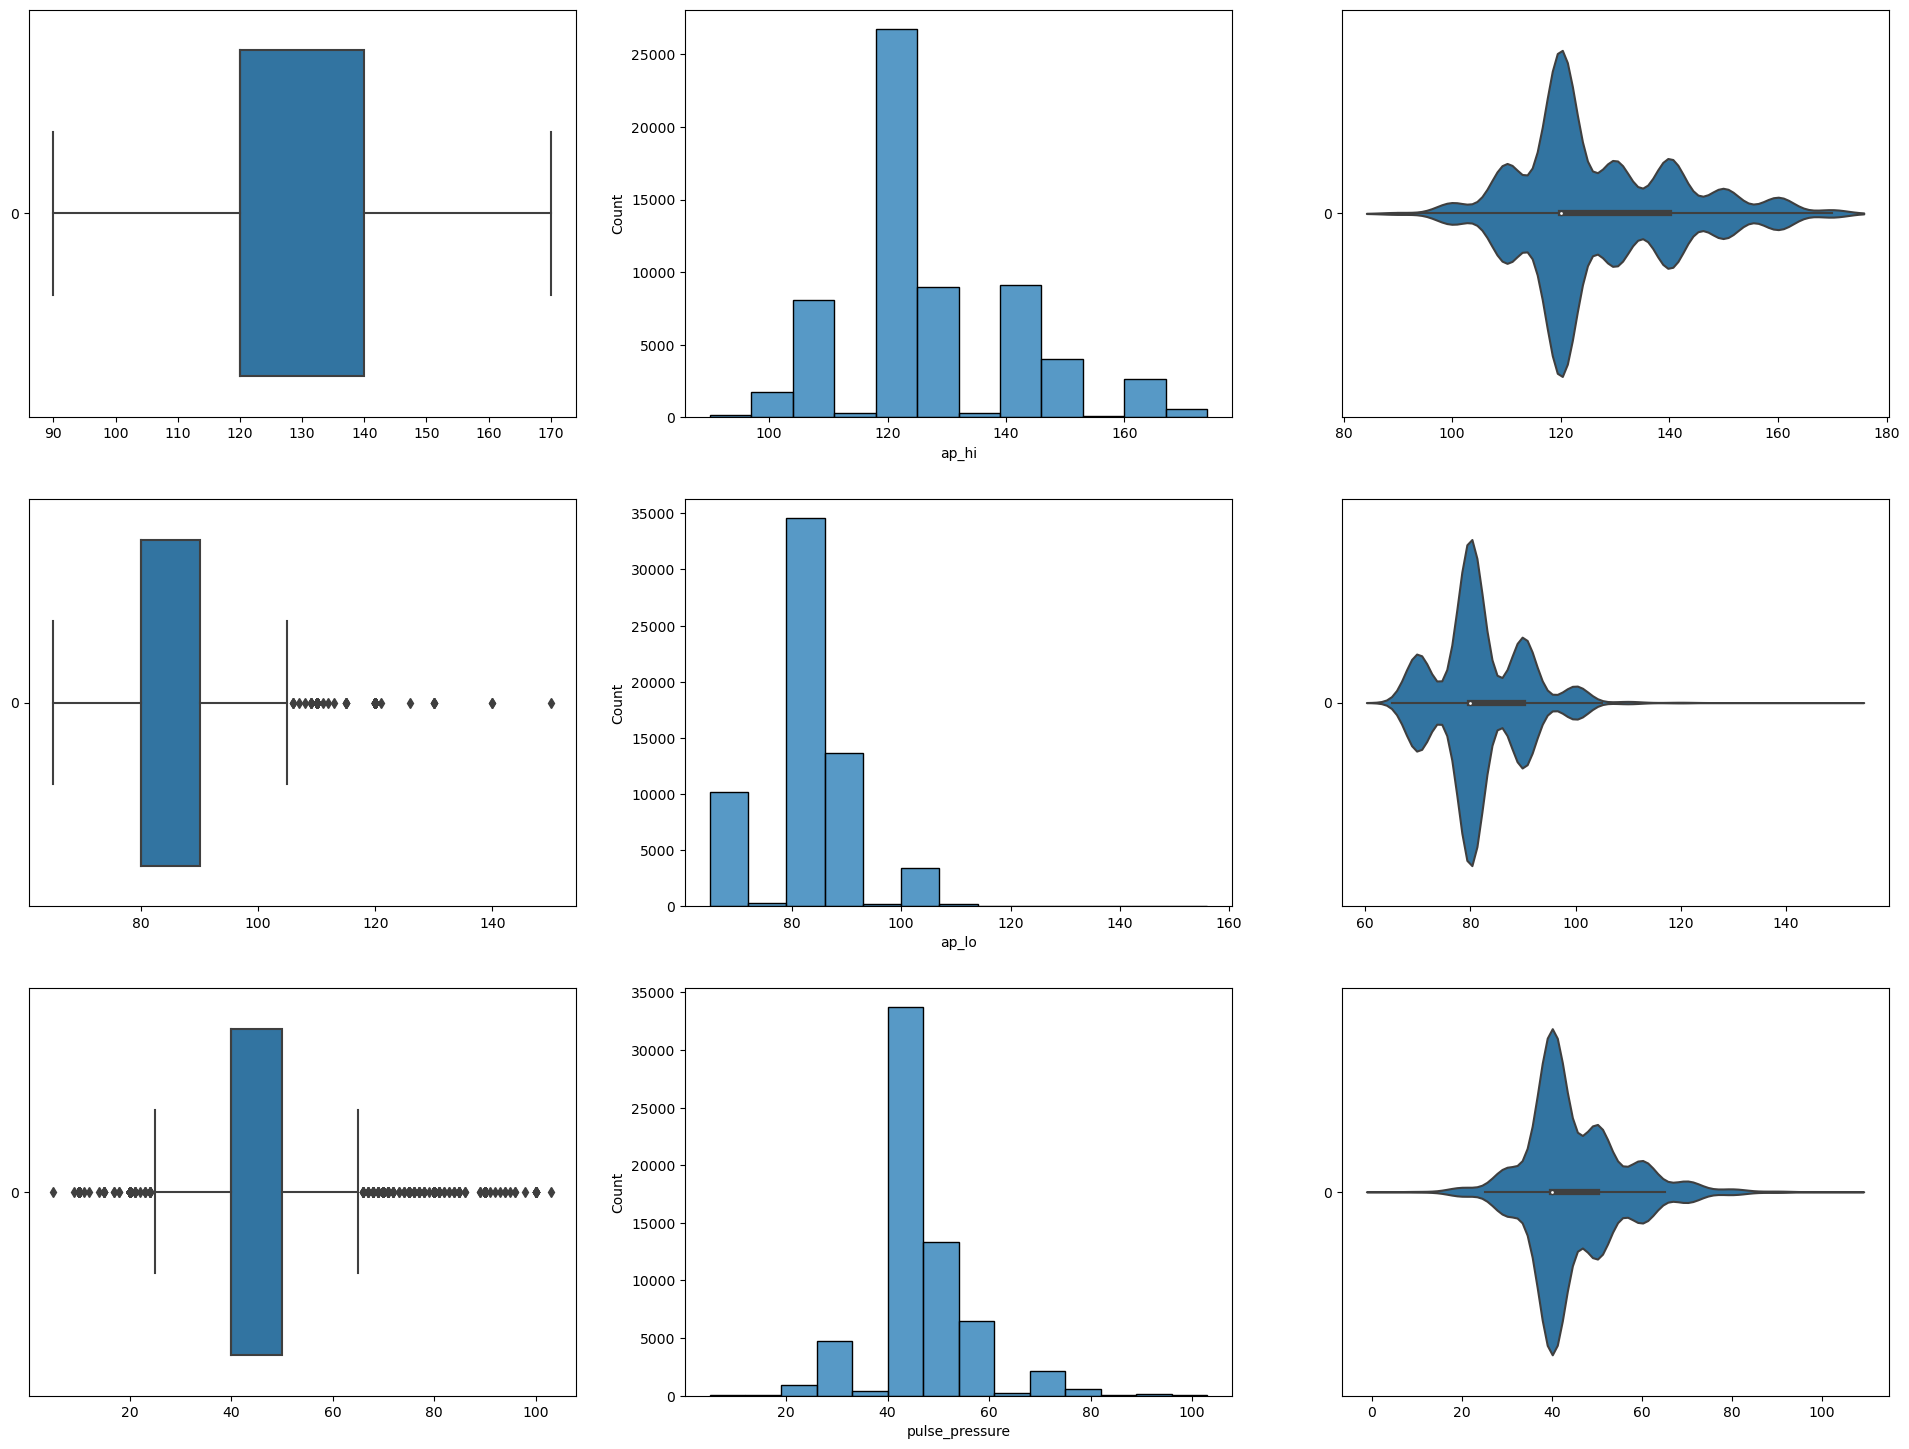

In [41]:
f, axes = plt.subplots(3, 3, figsize=(24, 18))

sns.boxplot(data = df['ap_hi'], orient = "h", ax = axes[0,0])
sns.histplot(data = df['ap_hi'], ax = axes[0,1], binwidth=7)
sns.violinplot(data = df['ap_hi'], orient = "h", ax = axes[0,2], bw=0.2)

sns.boxplot(data = df['ap_lo'], orient = "h", ax = axes[1,0])
sns.histplot(data = df['ap_lo'], ax = axes[1,1], binwidth=7)
sns.violinplot(data = df['ap_lo'], orient = "h", ax = axes[1,2], bw=0.3)

sns.boxplot(data = df['pulse_pressure'], orient = "h", ax = axes[2,0])
sns.histplot(data = df['pulse_pressure'], ax = axes[2,1], binwidth=7)
sns.violinplot(data = df['pulse_pressure'], orient = "h", ax = axes[2,2], bw=0.3)

The statistics, for blood pressure are slightly odd, with 25% and 50% meaning that 1/4 of patients studied have 120 systolic blood pressure and 80 diastolic blood pressure, but we believe that there is some part due to measurement error.

<h4>Visualizing Categorical Values</h4>

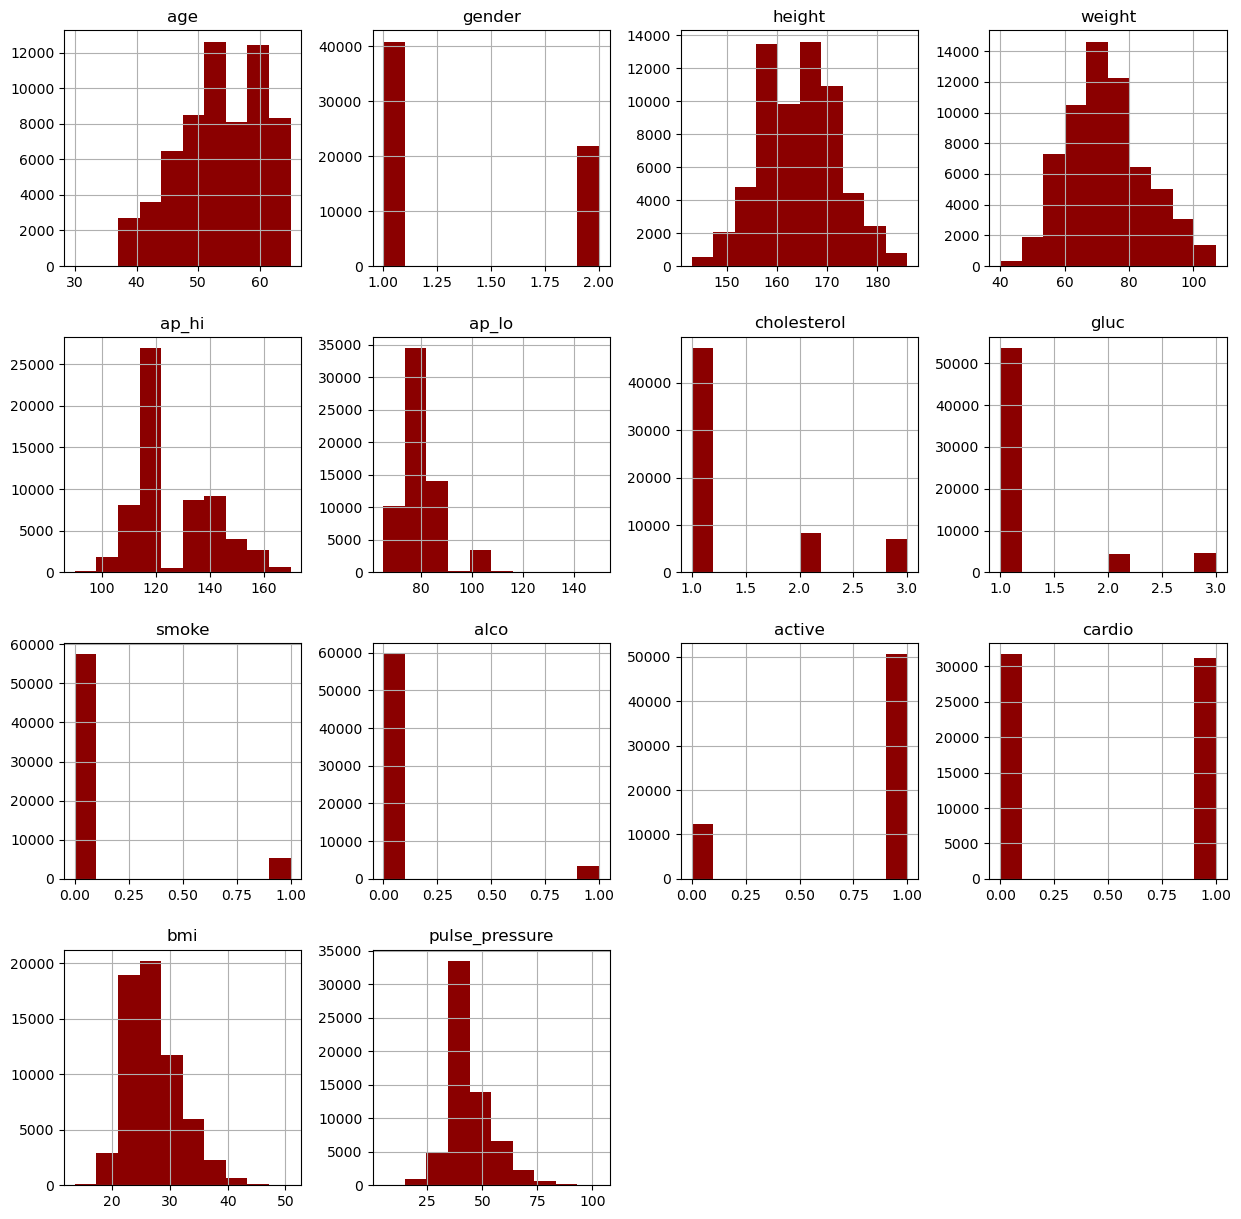

In [42]:
df.hist(figsize = (15, 15),color = 'darkred')
plt.show()

Looking at histogram plots for the rest of the categorical values, we notice that certain features are unbalanced, such as smoking, alcohol usage, activeness, and not so much cholesterol and glucose. However, there is a certain inevitability to that nature due to the priority being the balancedness of the feature that is to be predicted, which is Cardiovascular disease being almost 50-50

<a id='2.2'></a>
<h3>2.2 Multi-Variate Exploratory Analysis</h3>

<h3>KDE Plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.</h3>

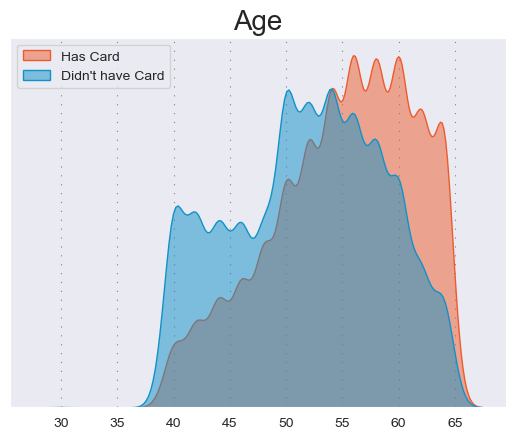

In [43]:
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('cardio == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has Card', alpha = 0.5)
sns.kdeplot(df.query('cardio == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have Card", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

Here we briefly look at KDE plots for age with respect to cardiovsacular disease, and find that the chances of getting cardiovascular disease greatly increase after 55, as observed with the continuous probability of the presence of cardiovascular disease significantly increases post age-55.

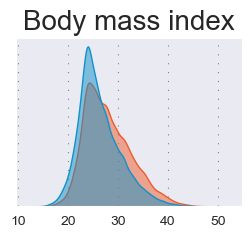

In [44]:
plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('cardio == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has Cardio Disease', alpha = 0.5)
sns.kdeplot(df.query('cardio == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have Cardio Disease", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

Similarly, for body mass index, this appears to be the same as well, with a large proportion of cardiovascular disease patients increasing in probability moreso after 28. However, the strong overlap also suggests that this may not be the case due to how a KDE works and overlapping making the findings more unreliable, therefore we will need to find out more following.

In [45]:
df['gender'].value_counts()

1    40904
2    21929
Name: gender, dtype: int64

We also look at how gender affects other factors, to find if gender is one of the main underlying factors for presence of cardiovascular disease, such as if gender affects height which subsequently affects chance of getting cardiovascular disease, and so forth.

In [46]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender         1         2
cardio                    
0       0.327296  0.176850
1       0.323699  0.172155

First we observe that women get significantly more cardiovascular disease than men in this data set, despite the dataset containing more women than men.

In [47]:
df.groupby('gender')['alco'].sum()

gender
1    1012
2    2275
Name: alco, dtype: int64

We also observed certain features, to find out if there are strong behavioural differences beteween men and women, as shown by how men typically drink more alcohol than women to a large extent with the difference being 2275 compared to 1013 despite the dataset containing more men than women.

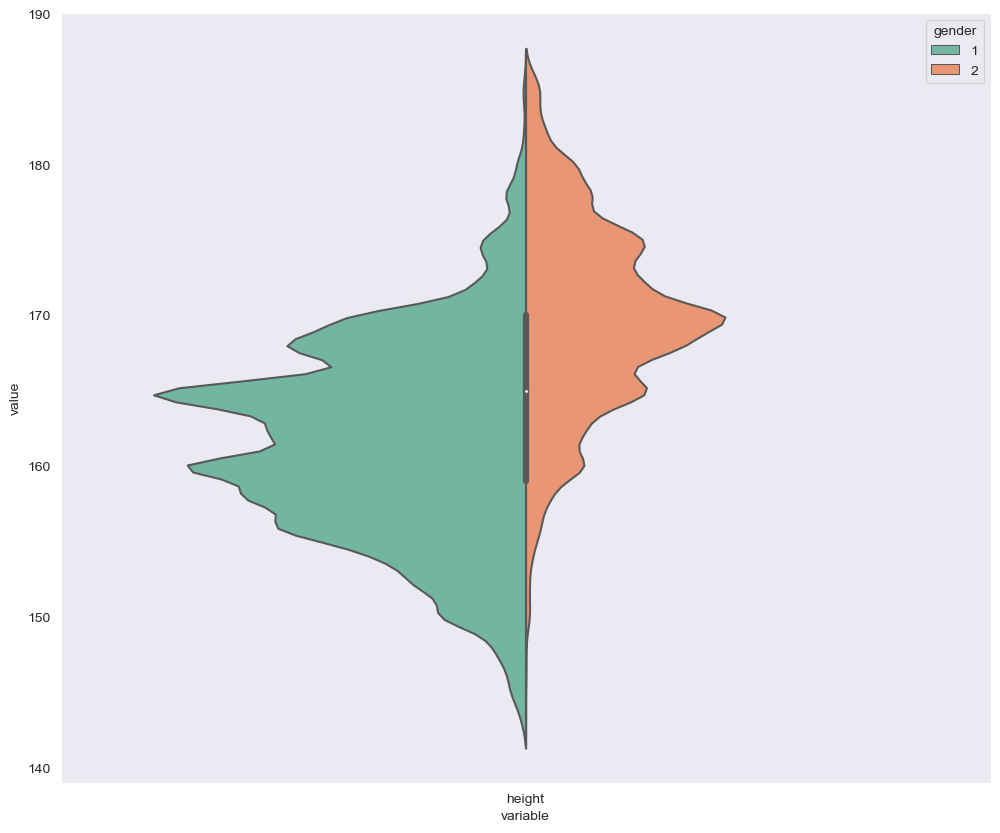

In [48]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Interestingly, this specific dataset has values that lean towards the higher end of height for women compared to men, indicating that women in this study were generally taller than the men in this study. This could have resulted in potentially different results, such as meaning that since height is in general higher, that women would have higher chances of getting cardiovascular disease.

**How do each of the factors affect the presence of cardiovascular disease?**

<a id='2.3'></a>
<h2>2.3 Correlation</h2>

The correlation matrixes for categorical variables can also be analysed, with a dython library, using Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.

In [49]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['bmi_category', 'blood_pressure_level']

In [50]:
from dython.nominal import identify_numeric_columns
numeric_features=identify_numeric_columns(df)
numeric_features

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'bmi',
 'pulse_pressure']

Since we are focusing on categorical-continuous variables, we only look at Correlation ratio for cardiovascular disease correlation with the 2 new categorical variables as above.


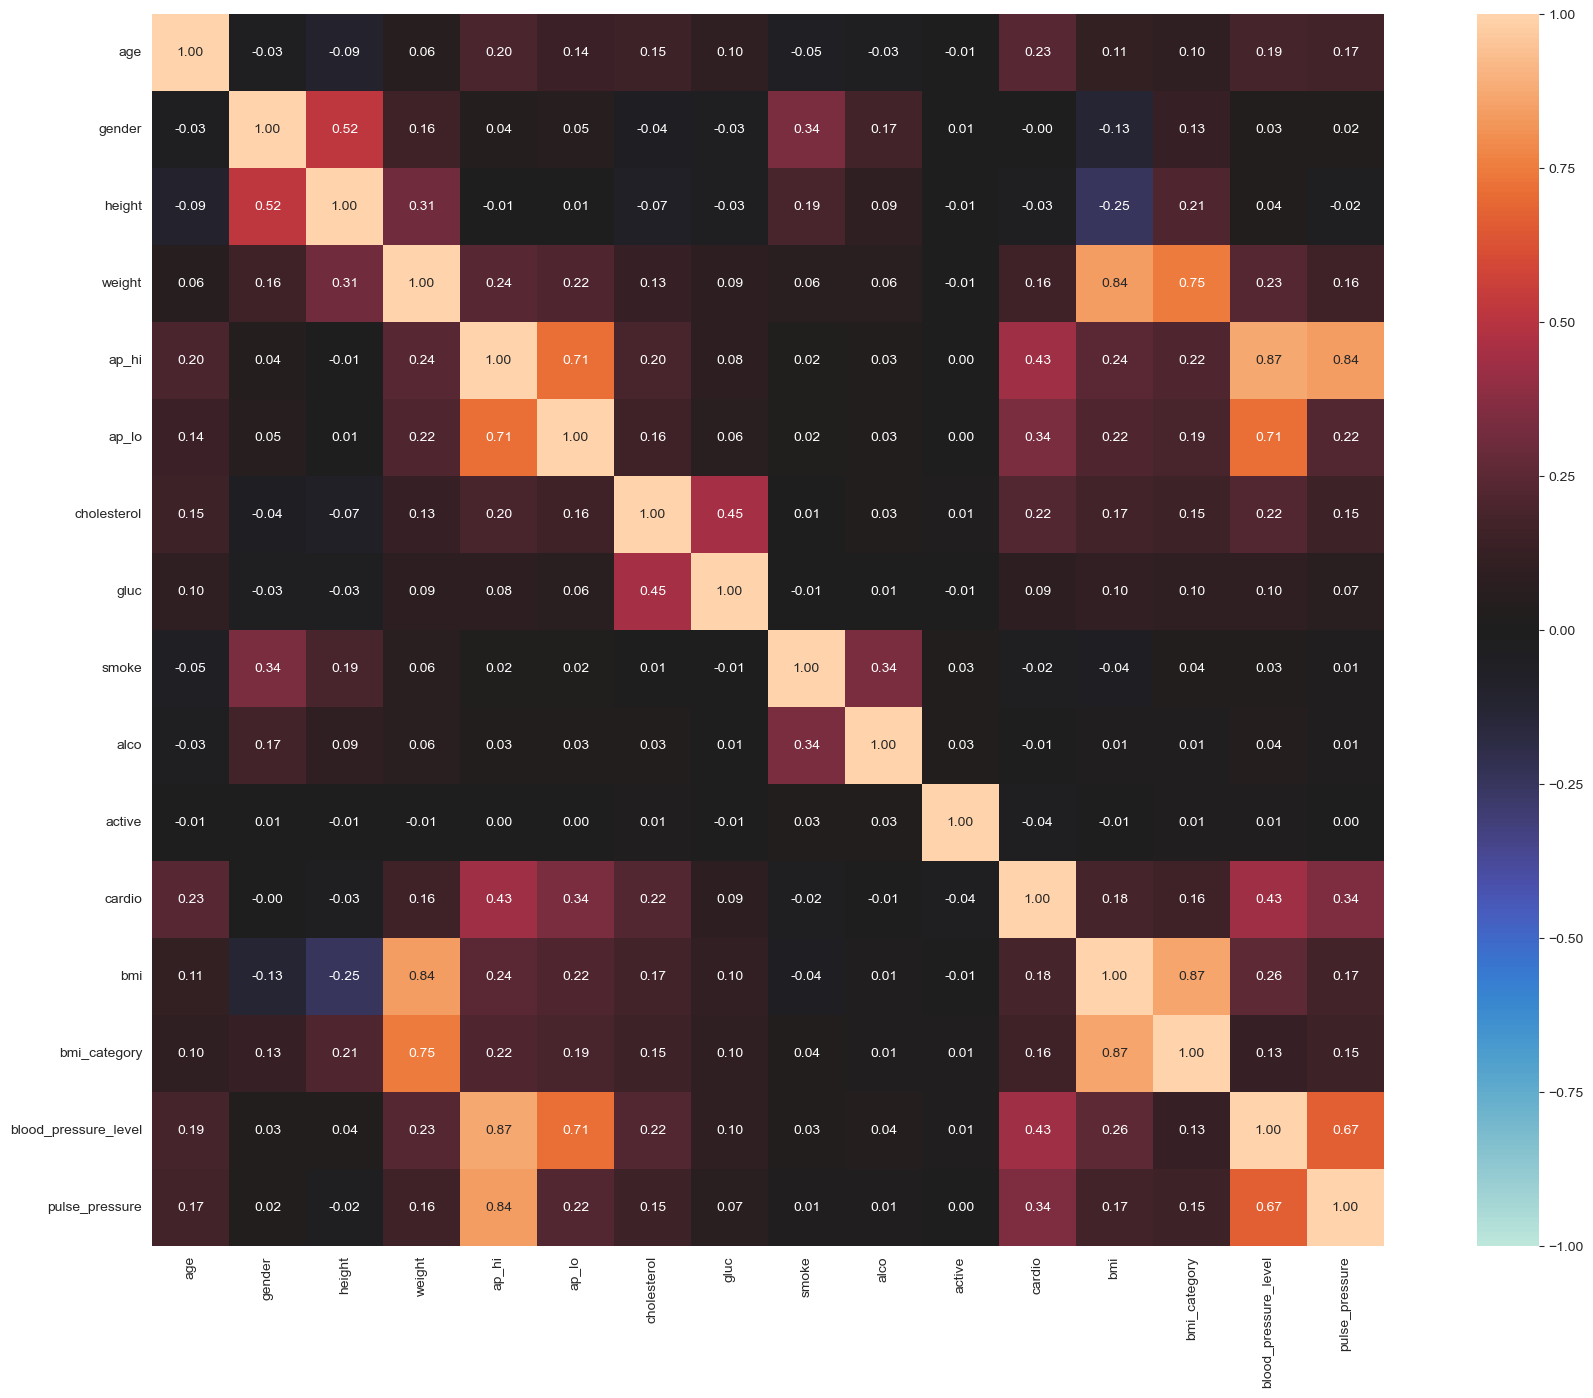

{'corr':                            age    gender    height    weight     ap_hi  \
 age                   1.000000 -0.030761 -0.094212  0.057167  0.202293   
 gender               -0.030761  1.000000  0.518031  0.158120  0.044253   
 height               -0.094212  0.518031  1.000000  0.305374 -0.010285   
 weight                0.057167  0.158120  0.305374  1.000000  0.235705   
 ap_hi                 0.202293  0.044253 -0.010285  0.235705  1.000000   
 ap_lo                 0.142089  0.048732  0.006281  0.216323  0.712352   
 cholesterol           0.154119 -0.043168 -0.068275  0.126992  0.195173   
 gluc                  0.096125 -0.025672 -0.028435  0.087738  0.084078   
 smoke                -0.047662  0.336981  0.192198  0.064108  0.021226   
 alco                 -0.028655  0.169126  0.093967  0.063741  0.028653   
 active               -0.010248  0.007488 -0.009261 -0.013431  0.002471   
 cardio                0.234795 -0.003779 -0.027234  0.162876  0.433964   
 bmi             

In [51]:
associations(df, nominal_columns=categorical_features, numerical_columns=numeric_features, figsize=(24, 16))

Interestingly, the 2 new categorical variables fit into our rankings of variables that correlate with presence of cardiovascular disease, with Systolic Blood Pressure having the highest Correlation with our presence of Cardiovascular disease.

1.   Systolic Blood Pressure (ap_hi) : 0.434
2.   Blood Pressure Level : 0.430
3.   Pulse Pressure : 0.344
4.   Diatolic Blood Pressure (ap_lo): 0.337
5.   Age : 0.235
6.   Cholesterol: 0.219
8.   BMI : 0.180
9.   Weight: 0.163
10. BMI Category: 0.159


Lowest rankings are:
1. Gender: -0.0
2. Alcohol: -0.01
3. Smoking: -0.02
4. Height: -0.03

Furthermore, the top 4 rankings all consist of data that is built around each other, namely Systolic Blood Pressure, Blood Pressure levels, Pulse Pressure and Diatolic Blood Pressure. However, the correlation matrixes indicate that Systolic Blood Pressure is a better predictor of cardiovascular disease than diatolic blood pressure, though they are better features than the other features.

<a id='3'></a>
<h2> 3. Modelling</h2>

To preface the analysis of our models, we specifically look at the recall value of the model, also known as the TP/TP+FN, because we prioritize the accuracy of our predictions of cardiovascular disease, and aim to reduce the number of false negative cases, to minimize error in predicting presence of cardiovascular disease.

Therefore, models will also be trained to prioritize recall score given the chance.

In [52]:
#split into train and test
df1 = df.copy()
df1['blood_pressure_level'] = df1['blood_pressure_level'].astype('category')
df1['bmi_category'] = df1['bmi_category'].astype('category')

In [53]:
df1.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.0       2     168    62.0    110     80            1     1      0     0   
1  55.0       1     156    85.0    140     90            3     1      0     0   
2  52.0       1     165    64.0    130     70            3     1      0     0   
3  48.0       2     169    82.0    150    100            1     1      0     0   
5  60.0       1     151    67.0    120     80            2     2      0     0   

   active  cardio        bmi bmi_category  blood_pressure_level  \
0       1       0  21.967120       Normal                Normal   
1       1       1  34.927679        Obese  Stage_1_Hypertension   
2       0       1  23.507805   Overweight           High_Normal   
3       1       1  28.710479   Overweight  Stage_1_Hypertension   
5       0       0  29.384676   Overweight                Normal   

   pulse_pressure  
0              30  
1              50  
2              60  
3              50  
5              40

In [54]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df1[['bmi_category','blood_pressure_level']])
df1[['bmi_category','blood_pressure_level']] = enc.transform(df1[['bmi_category','blood_pressure_level']])

In [55]:
X=df1.copy().drop(['cardio'],axis=1)
y=df1['cardio']

In [56]:
df1.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.0       2     168    62.0    110     80            1     1      0     0   
1  55.0       1     156    85.0    140     90            3     1      0     0   
2  52.0       1     165    64.0    130     70            3     1      0     0   
3  48.0       2     169    82.0    150    100            1     1      0     0   
5  60.0       1     151    67.0    120     80            2     2      0     0   

   active  cardio        bmi  bmi_category  blood_pressure_level  \
0       1       0  21.967120           0.0                   1.0   
1       1       1  34.927679           1.0                   2.0   
2       0       1  23.507805           2.0                   0.0   
3       1       1  28.710479           2.0                   2.0   
5       0       0  29.384676           2.0                   1.0   

   pulse_pressure  
0              30  
1              50  
2              60  
3              50  
5              40

Split dataset into train and test sets.

Since Presence of Cardiovascular disease is the dependent variable, we make this the y variable, while x is the independent variables.

In [57]:
# X_LR = df1.copy().drop(['bmi_category','blood_pressure_level','cardio'],axis=1)

In [58]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()

# X_balanced, X_test, Y_balanced, Y_test = train_test_split(X,y, test_size = 0.2)
# X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

# X_train_balanced_list=X_train_balanced.columns.values.tolist()

# print(X_train_balanced_list)


In [59]:
X_train_balanced, X_test, Y_train_balanced, Y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced_list = X_train_balanced.columns.values.tolist()

By the Pareto principle, and following standard train-test split principles, we do a 80-20 train test split.

<a id='3.1'></a>
<h2> 3.1 Logistic Regression </h2>

Logistic regression is similar to linear regression in the sense that it is used to estimate the relationship between a dependent variable and one or more independent variables, but is used to make a prediction about a categorical variable versus a continuous one; generally uses a logistic function to model a binary dependent variable.


Fitting the dataset into a multinomial logistic regression which combines the multiple different variables, categorical and continuous, we get this following classification report.

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=600)
model.fit(X_train_balanced,Y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.74      6379
           1       0.74      0.64      0.69      6188

    accuracy                           0.71     12567
   macro avg       0.72      0.71      0.71     12567
weighted avg       0.72      0.71      0.71     12567



The above logistic regression classification report makes use of numeric features, which is inclusive of age, height, weight, ap_hi, etc. but this is not good for the model because of the lack of scaling, resulting in overall too much sensitivity to range of data points.

Therefore, we repeated the logistic regression model with only categorical figures, but with the bins we implemented in the above, such as bmi_categories and blood_pressure levels.

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df2 = df.copy()
enc.fit(df2[['bmi_category','blood_pressure_level']])
df2[['bmi_category','blood_pressure_level']] = enc.transform(df2[['bmi_category','blood_pressure_level']])

Using an ordinal encoder to encode the different levels for blood pressure and bmi into numbers that can be used in a multinomial logistic regression as follows:

In [62]:
x_lr=df2.copy().drop(['cardio','age','height','weight','bmi','ap_hi',
                     'ap_lo','pulse_pressure'],axis=1)
y_lr=df2['cardio']

In [63]:
x_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62833 entries, 0 to 66571
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                62833 non-null  int64  
 1   cholesterol           62833 non-null  int64  
 2   gluc                  62833 non-null  int64  
 3   smoke                 62833 non-null  int64  
 4   alco                  62833 non-null  int64  
 5   active                62833 non-null  int64  
 6   bmi_category          62833 non-null  float64
 7   blood_pressure_level  62833 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 6.3 MB


In [64]:
x_lr['blood_pressure_level'].describe()

count    62833.000000
mean         1.171088
std          0.706125
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: blood_pressure_level, dtype: float64

In [65]:
xlr_train, xlr_test, ylr_train, ylr_test = train_test_split(x_lr,y_lr, test_size = 0.2)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=600)
model.fit(xlr_train,ylr_train)
ylr_pred = model.predict(xlr_test)
print(classification_report(ylr_test, ylr_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      6345
           1       0.73      0.59      0.65      6222

    accuracy                           0.69     12567
   macro avg       0.70      0.69      0.69     12567
weighted avg       0.70      0.69      0.69     12567



Fitting the logistic regression model into a dataframe with only categorical variable results in the above classification report with a 0.78 for recall for cardio=0 and 0.59 of recall for cardio=1

<a id='3.2'></a>
<h2>3.2 Decision Tree </h2>

A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression problems. A decision tree is simply a series of sequential decisions made to reach a specific result, split by independent features using 2 forms of parameters: gini or entropy.

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions

Using Gridsearch to find the ideal number of features to use in our decision tree, and find the maximum depth of such an optimal decision tree, we do the following:

We ensure to use recall as the scoring metric for our gridsearch, since we are looking at presence of medical illnesses.

In [67]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


tree_dpt = DecisionTreeClassifier()

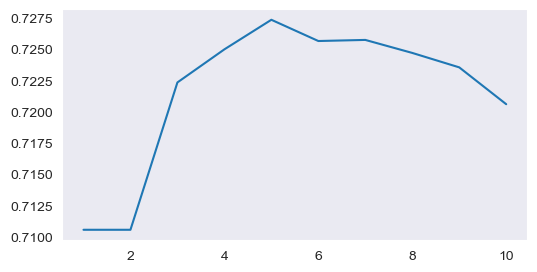

<Figure size 1200x600 with 0 Axes>

In [97]:
timesrun = 30
acc_test_array_ave = []
for i in range(0,timesrun):
    X_train_balanced, X_test, Y_train_balanced, Y_test = train_test_split(X,y, test_size = 0.2)
    X_train_balanced_list = X_train_balanced.columns.values.tolist()
    #acc_train_array = []
    acc_test_array = []
    for depth in range(1,11):
        dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
        dectree.fit(X_train_balanced, Y_train_balanced)                    # train the decision tree model
    
        #acc_train_array.append(dectree.score(X_train_balanced, Y_train_balanced))
        acc_test_array.append(dectree.score(X_test, Y_test))
        
    if acc_test_array_ave == []:
        acc_test_array_ave = acc_test_array
    else:
        for i in range(0,len(acc_test_array_ave)):
            acc_test_array_ave[i] += acc_test_array[i]

for i in range(0,len(acc_test_array_ave)):
    acc_test_array_ave[i] = acc_test_array_ave[i]/timesrun
# Plot the Confusion Matrix for Train and Test
fig, ax = plt.subplots(figsize = (6,3))
#ax.plot(range(1,11), acc_train_array)
ax.plot(range(1,11), acc_test_array_ave)
plt.figure(figsize=(12, 6))
plt.show()


We find the average of the different classsification accuracies of 30 different decision trees. The result shows the best max-depth that yield the highest correlation value is 5.

However we found the better way to determine the best parameters is through utilising GridSearch

The effectiveness of a decision tree is dependent on the node splitting function of the decision tree; in other words, entropy (information gain) or phi function.

An advantage of information gain is that it tends to choose the most impactful features that are close to the root of the tree, meaning we can find factors that have the most impact on our predictor.

Furthermore, we recognize that going deeper in the tree can cause an accuracy decrease in general, so it is very important to test modifying the depth of the decision tree and selecting the depth that produces the best results, therefore we attempted 2 methods of doing so, as shown. 

In [69]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10]}
grid = GridSearchCV(tree_dpt, tree_param, scoring='recall')
grid.fit(X_train_balanced,Y_train_balanced)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'entropy', 'max_depth': 4}


Here we find that the entropy is a better measure of choice for splitting the tree as compared to gini, as entropy is defined as  the amount of uncertainty involved in splitting the decision, and the max depth for an optimal classification tree is 4. However, instead of choosing classification accuracy for our metric of measuring the efficiency of algorithm, we choose to use cardio=1 in recall instead. This is because recall would be most suitable for a medical disease problem in measuring TP/TP+FN, for minimizing FN.

In [70]:
tree_dpt2 = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
tree_dpt2.fit(X_train_balanced, Y_train_balanced)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'ap_hi <= 129.5\nentropy = 1.0\nsamples = 50266\nvalue = [25423, 24843]\nclass = N'),
 Text(0.25, 0.7, 'age <= 54.5\nentropy = 0.903\nsamples = 30030\nvalue = [20468, 9562]\nclass = N'),
 Text(0.125, 0.5, 'cholesterol <= 1.5\nentropy = 0.794\nsamples = 18190\nvalue = [13835, 4355]\nclass = N'),
 Text(0.0625, 0.3, 'age <= 45.5\nentropy = 0.747\nsamples = 15637\nvalue = [12307, 3330]\nclass = N'),
 Text(0.03125, 0.1, 'entropy = 0.58\nsamples = 5106\nvalue = [4400, 706]\nclass = N'),
 Text(0.09375, 0.1, 'entropy = 0.81\nsamples = 10531\nvalue = [7907, 2624]\nclass = N'),
 Text(0.1875, 0.3, 'cholesterol <= 2.5\nentropy = 0.972\nsamples = 2553\nvalue = [1528, 1025]\nclass = N'),
 Text(0.15625, 0.1, 'entropy = 0.919\nsamples = 1804\nvalue = [1201, 603]\nclass = N'),
 Text(0.21875, 0.1, 'entropy = 0.988\nsamples = 749\nvalue = [327, 422]\nclass = Y'),
 Text(0.375, 0.5, 'cholesterol <= 2.5\nentropy = 0.99\nsamples = 11840\nvalue = [6633, 5207]\nclass = N'),
 Text(0.3125, 0.3, '

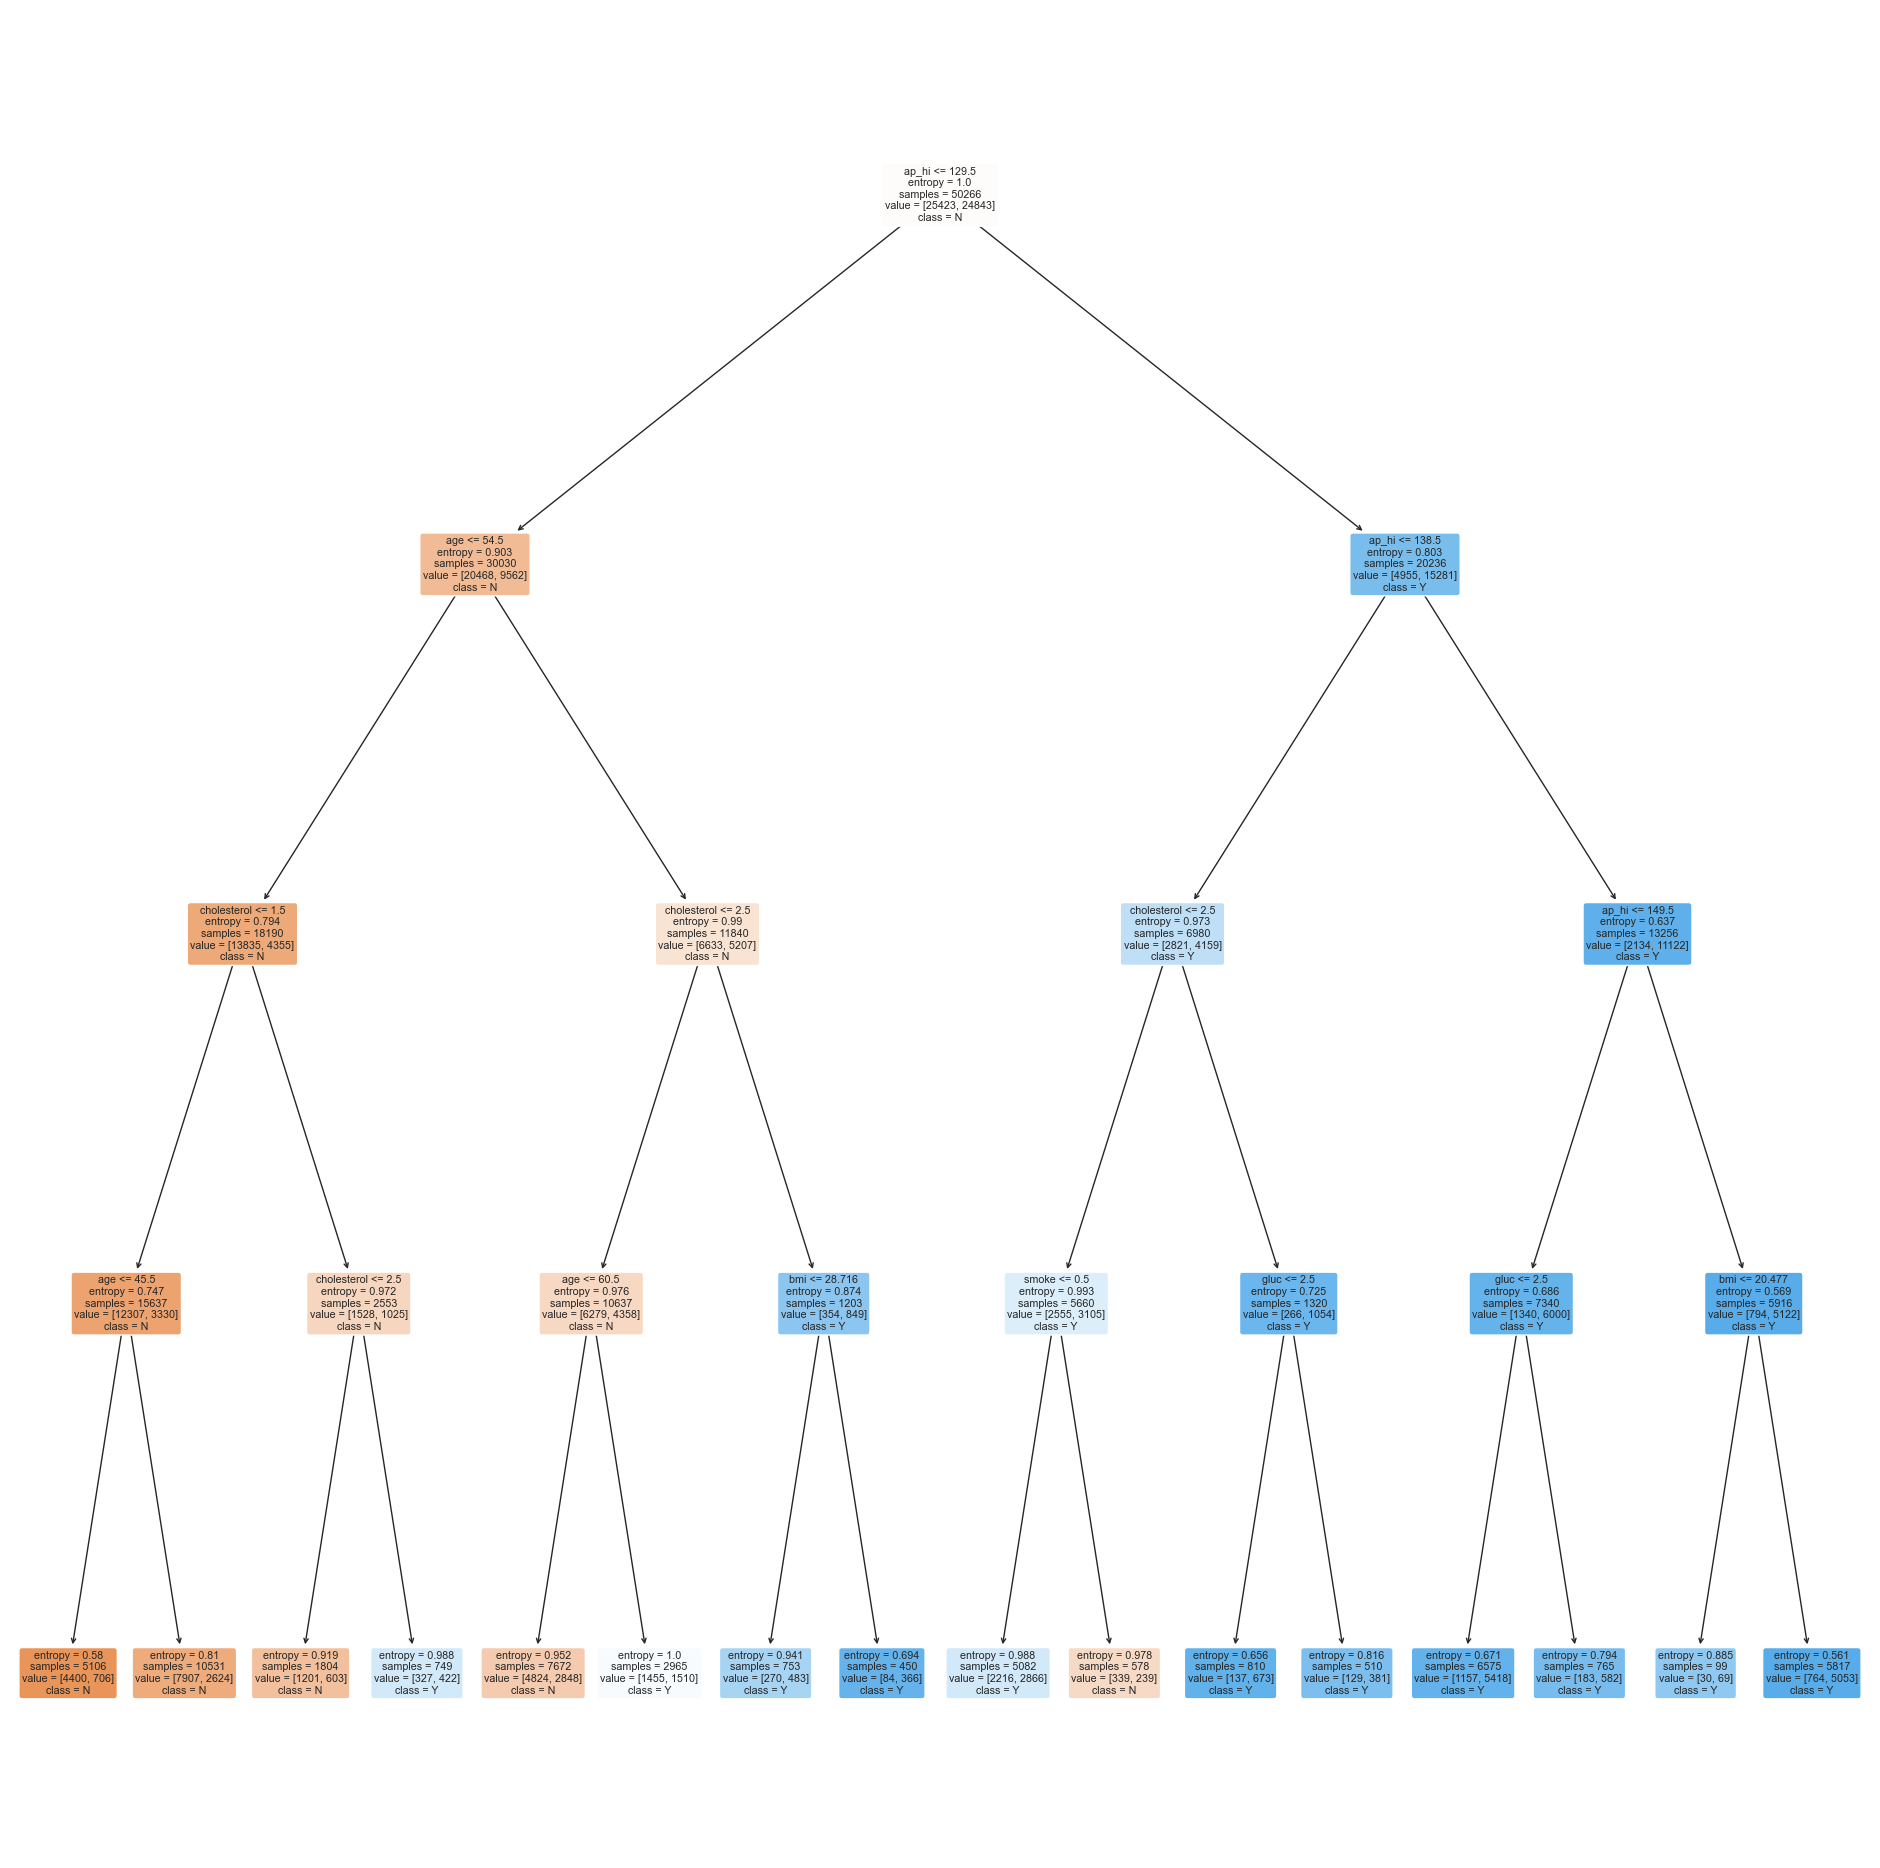

In [72]:
f = plt.figure(figsize=(24,24))
plot_tree(tree_dpt2, filled=True, rounded=True,
         feature_names=X_train_balanced.columns,
         class_names=["N", "Y"])

Plotting a depth 4 classification tree, we have the classification report as follows.

In [73]:
y_pred = tree_dpt2.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      6254
           1       0.73      0.71      0.72      6313

    accuracy                           0.72     12567
   macro avg       0.72      0.72      0.72     12567
weighted avg       0.72      0.72      0.72     12567



We measure metrics by recall, and observe that recall scores for 0 is 0.74, while recall score for 1 is 0.71

In [74]:
print("Classification Accuracy \t:", tree_dpt2.score(X_test, Y_test))

Classification Accuracy 	: 0.7214132251133922


In [75]:
f_imp1 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp1.index)):
    f_imp1.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp1['importance'] =tree_dpt2.feature_importances_
f_imp1 = f_imp1.sort_values('importance', ascending = False)
f_imp1[0:15].style.background_gradient(cmap = 'Blues')

The following shows the importance of features used in our classification tree model, and we find that ap_hi was the most significant feature used to split the classification tree; By observation, we find that age and cholesterol were significant features in splitting the decision tree as well, with 0.494 of gini punity for splitting with cholesterol and 0.484 of gini punity for splitting with age.

<AxesSubplot:>

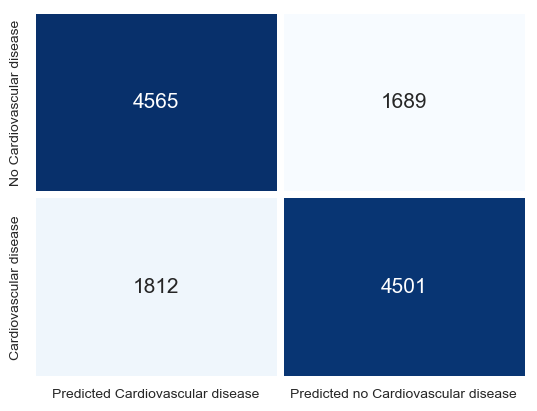

In [76]:
y_pred = tree_dpt2.predict(X_test)

dt_cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(dt_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Cardiovascular disease', 'Cardiovascular disease'], xticklabels = ['Predicted Cardiovascular disease', 'Predicted no Cardiovascular disease'])


<a id='3.3'></a>
<h2>3.3 Random Forest </h2>

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions.

The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.

Random decision forests correct for decision trees' habit of overfitting to their training set, and we learnt that random forests are in general suppose to outperform decision trees, but this varies based on the data characteristics.

Thus random forests are much more successful than decision trees only if the trees are diverse and acceptable.

In [77]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
fit = model.fit(X_train_balanced, Y_train_balanced)

Using gridsearch to find the optimal number of trees for a random forest and maximum features.

note that Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

In [79]:
grid = GridSearchCV(rfc,param_grid, scoring='recall', n_jobs=-1)

In [80]:
grid.fit(X_train_balanced,Y_train_balanced)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='recall')

In [81]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 200}

Here we find that the best number of features in the random forest decision tree of 200 decision trees is 3, and therefore fit the train set as so

In [82]:
rfc = RandomForestClassifier(max_features=3,n_estimators=200,bootstrap=True)

Fitting the model into the random forest,

In [83]:
rfc.fit(X_train_balanced,Y_train_balanced)

RandomForestClassifier(max_features=3, n_estimators=200)

In [84]:
rfc.score(X_test, Y_test)

0.6901408450704225

This is the classification accuracy of the model, but we don't look at it as heavily as we weight recall score, due to the reasons mentioned above and is also discussed in the conclusion.

In [85]:
y_pred=rfc.predict(X_test)

In [86]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6254
           1       0.70      0.68      0.69      6313

    accuracy                           0.69     12567
   macro avg       0.69      0.69      0.69     12567
weighted avg       0.69      0.69      0.69     12567



Here we find that the recall score of the random forest is 0.66 for 1 and 0.79 for 0.

In [87]:
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] =rfc.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

Looking at the features that were of highest importance to the random forest model (highest influence), we find the rankings are as observed above, with BMI being of the highest importance and as follows.

<a id='3.4'></a>
<h2>3.4 XGBOOST</h2>

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

A Gradient Boosting Decision Trees (GBDT) is a decision tree ensemble learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.

Both random forest and GBDT build a model consisting of multiple decision trees. The difference is in how the trees are built and combined

The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. 

In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6254
           1       0.75      0.67      0.71      6313

    accuracy                           0.72     12567
   macro avg       0.73      0.72      0.72     12567
weighted avg       0.73      0.72      0.72     12567



Here we implement the XGBoost model and find that we have a recall of 0.78 and 0.69 for 0 and 1 respectively

In [89]:
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] =xgb.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

We find that XGBoost weighs ap_hi the highest, as the feature of most importance to the model, followed by cholesterol, age, etc.

In [90]:
# rfe3 = RFE(estimator=xgb, n_features_to_select=4)
# fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
# print("Num Features: %s" % (fit3.n_features_))
# features = {'Features': X_train_balanced_list,'Selected Features':fit3.support_ ,'Feature Ranking':fit3.ranking_}
# rfe_df3 = pd.DataFrame(features)
# rfe_df3

  <a id='3.5'></a>
  <h2>3.5 Naive Bayes</h2>

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Note that Naive Bayes uses the Bayes’ Theorem and assumes that all predictors are independent. In other words, this classifier assumes that the presence of one particular feature in a class doesn’t affect the presence of another one, which may be more useful in our dataset, since I chose to increase the dataset by binning multiple models, and combining them such as in BMI combining height and weight, and pulse pressure from ap_hi and ap_lo, making the naive nature of the naive bayes classifier less naive to prioritize different independent variables that are made from each other.

In [91]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train_balanced, Y_train_balanced)
y_pred = gauss.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      6254
           1       0.76      0.61      0.68      6313

    accuracy                           0.71     12567
   macro avg       0.72      0.71      0.71     12567
weighted avg       0.72      0.71      0.71     12567



Here, we get the classification report for our Naive Bayes classifier, note the recall score for cardio = 1 for 0.62 as well, as our defining metric for algorithm.

<a id='3.6'></a>
<h2>3.6 KNN</h2>

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

First we implement K nearest neighbors, with a large number of neighbours, so as to have a smoother decision boundary, resulting in lower variance but higher bias.

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 65, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      6254
           1       0.74      0.64      0.69      6313

    accuracy                           0.71     12567
   macro avg       0.71      0.71      0.71     12567
weighted avg       0.71      0.71      0.71     12567



<AxesSubplot:>

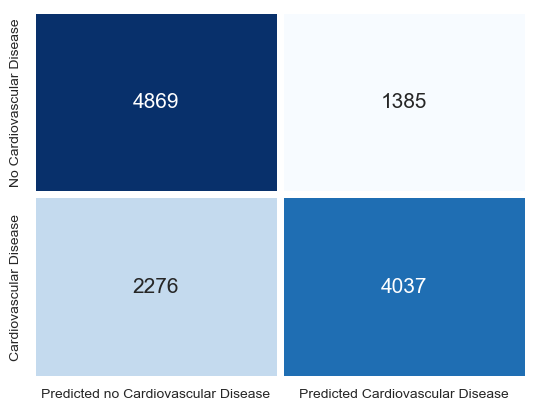

In [93]:
knn_cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(knn_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], xticklabels = ['Predicted no Cardiovascular Disease', 'Predicted Cardiovascular Disease'])

However, we also learnt that KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions.

Furthermore, to try and improve our model, we attempted to incorporate gridsearch to identify the hyperparameter for the optimal number of neighbours, 

Using gridsearch to find the optimal number of neighbours,

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, verbose=1, scoring='recall')
grid_search=grid.fit(X_train_balanced, Y_train_balanced)
print(grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 9}


In [96]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      6254
           1       0.71      0.65      0.68      6313

    accuracy                           0.69     12567
   macro avg       0.69      0.69      0.69     12567
weighted avg       0.69      0.69      0.69     12567



Recall scores are observedly better with 0.75 for cardio=0 and 0.66 for cardio=1

<a id='4'></a>
<h1>4 Conclusion</h1>

Comparing the feature importance, a repetitive feature that has a large importance in predicting the presence of cardiovascular disease is Systolic Blood Pressure (ap_hi), age and BMI, which follows that of analytical studies, where medical journals suggest that as ones age increases, so does their risk of developing cardiovascular disease, which is also one of the features with highest correlation in our correlation matrix. Other features that are notable include ap_hi, which expectedly remains as one of the top predictors of presence of cardiovascular disease, due to the observed correlation and it being a large factor in predicting presence of cardiovascular disease, as reiterated by medical websites around the world, such as that of the Singapore Heart Foundation which we have referenced in our data preprocessing. 

If we were to go back to answering the questions that we mentioned at the beginning of the report:

    How do each of the variables (risk factors) affect having CVD?

We notice that with the correlation matrix, blood pressure related features such as ap_hi, ap_lo, and statistics derived from blood pressure inclusive of pulse pressure and blood pressure levels affect presence cardiovascular disease the most, followed by Age, Cholesterol, and BMI. We observe from the correlation matrix for different variables and how much they affect the chances of having Cardiovascular disease.

    Based on a person’s health profile, can we predict if a person is likely to have CVD?
    
After using multiple machine learning models, we observe that most machine learning models are able to predict the presence of cardiovascular disease given the existence of factors as shown, with the most important factors being most significant in ability to predict disease to an accuracy of approximately 70%. However, we also recognize that for models, the ideal metric in measuring the ability of a model to perform is recall, as Cardiovascular disease is a medical illness, and to gauge the nature of models requires observing models with the highest recall value of cardio=1, so as to minimize false positives and maximize accuracy of prediction at the same time, with decision tree / random forest models having the highest recall values for cardio = 1 of 0.71-0.72.
